Implementing K-Means Clustering
Task: Apply K-Means clustering to the Iris dataset and visualize the clusters using a scatter plot of two features. Evaluate the clustering by comparing it to the actual species labels.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled)

In [6]:
data['Cluster'] = clusters

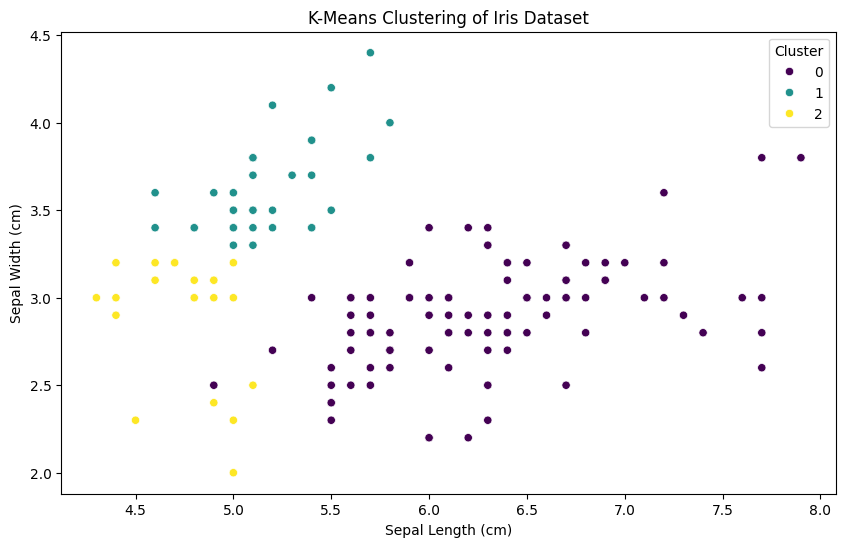

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['sepal length (cm)'], y=data['sepal width (cm)'], hue=data['Cluster'], palette='viridis')
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Cluster')
plt.show()

Choosing the Optimal Number of Clusters
Task: Use the Elbow Method and Silhouette Score to determine the optimal number of clusters for the Iris dataset. Visualize the Silhouette Score for different cluster counts.


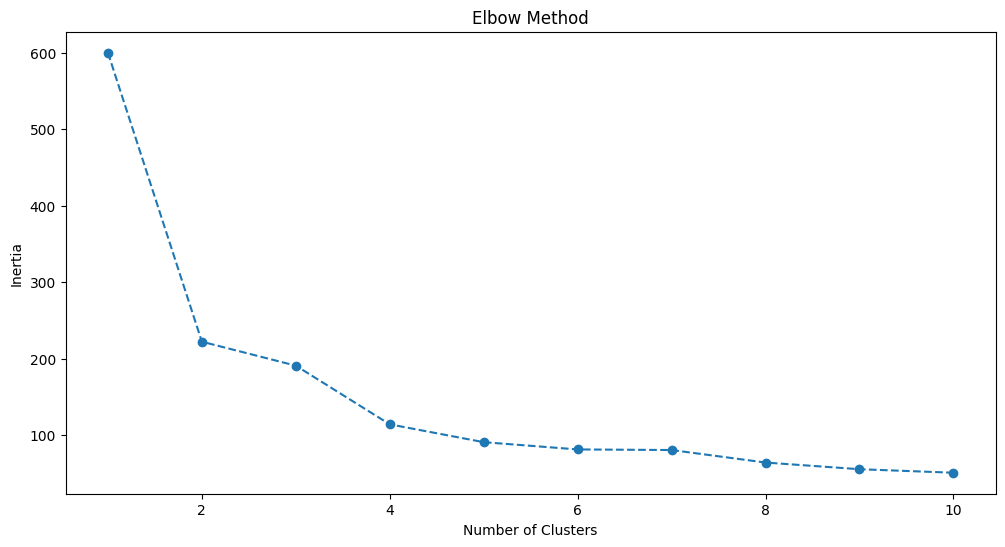

In [9]:
from sklearn.metrics import silhouette_score

# elbow method
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,6))
plt.plot(range(1,11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

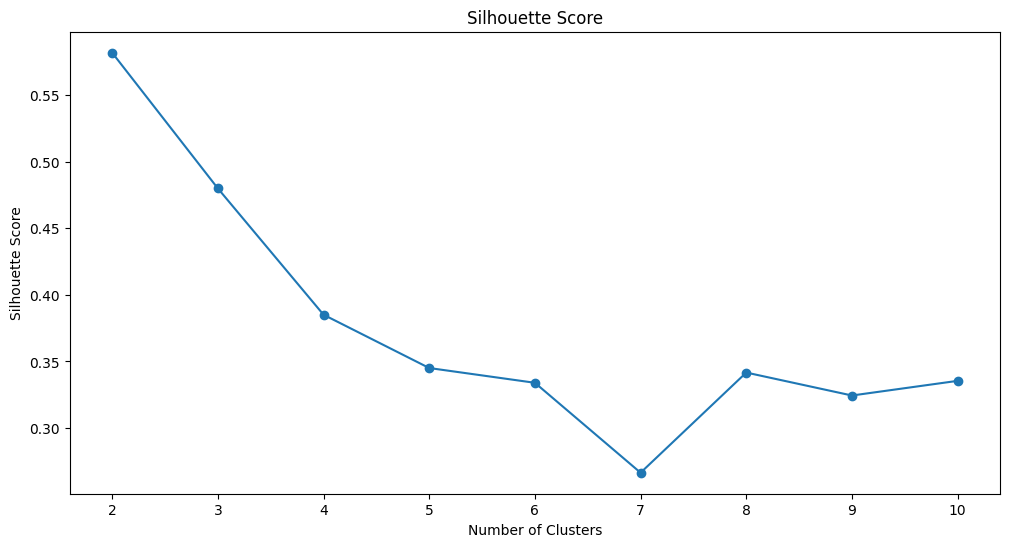

In [11]:
# Silhouette Score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled)
    sil_scores.append(silhouette_score(scaled, labels))
plt.figure(figsize=(12,6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Cluster Visualization with PCA
Task: Use Principal Component Analysis (PCA) to reduce the Iris dataset to two dimensions. Visualize the clusters obtained from K-Means clustering in the PCA-reduced space.


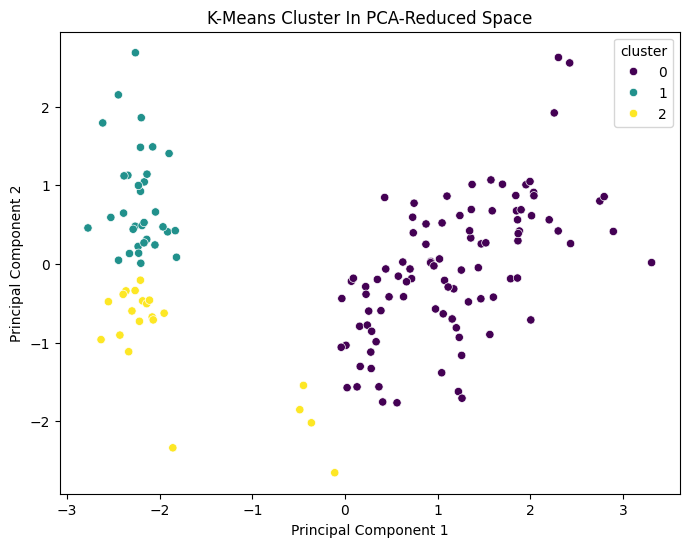

In [14]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled)


kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_pca)

plt.figure(figsize =(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['cluster'], palette = 'viridis')
plt.title('K-Means Cluster In PCA-Reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Hierarchical Clustering: Dendrogram
Task: Implement hierarchical clustering using the Iris dataset. Plot a dendrogram to visualize the clustering process and choose an appropriate number of clusters


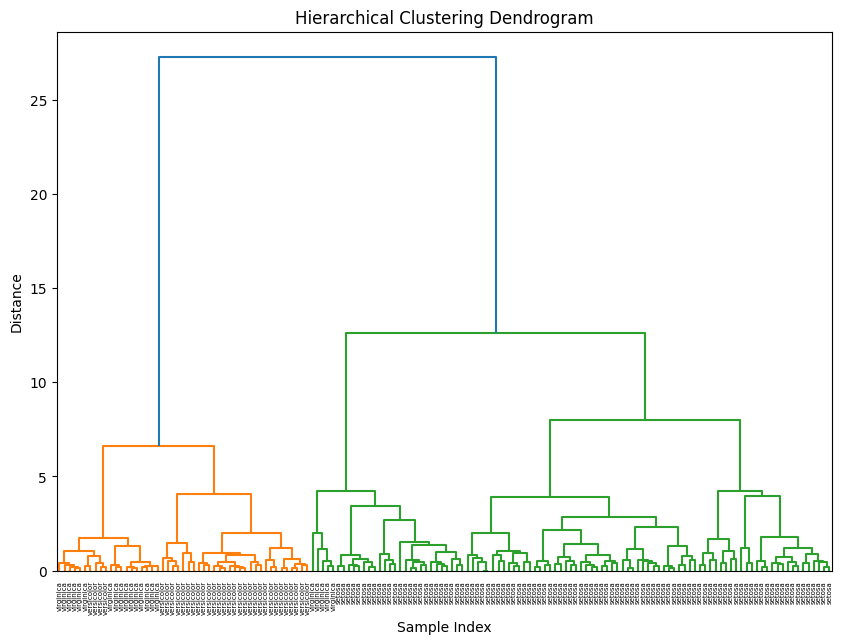

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(scaled, 'ward')

#plot the dendrogram
plt.figure(figsize = (10,7))
dendrogram(linked,
           labels = iris.target_names[clusters])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Comparing Clustering Algorithms
Task: Compare the performance of K-Means and Agglomerative Hierarchical Clustering on the Iris dataset. Discuss the strengths and weaknesses of each approach based on the results.


In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled)
     

# applying agglomerative hierarchical Clustering

agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(scaled)
     

# Evaluating the performance

kmeans_score = adjusted_rand_score(clusters, kmeans_labels)
agg_score = adjusted_rand_score(clusters, agg_labels)

print(f'Adjusted Rand Index for K-Means Clustering Score: {kmeans_score}')
print(f'Adjusted Rand Index for Agglomerative Hierarchical Clustering Score: {agg_score}')
     



Adjusted Rand Index for K-Means Clustering Score: 1.0
Adjusted Rand Index for Agglomerative Hierarchical Clustering Score: 0.5448459478217861


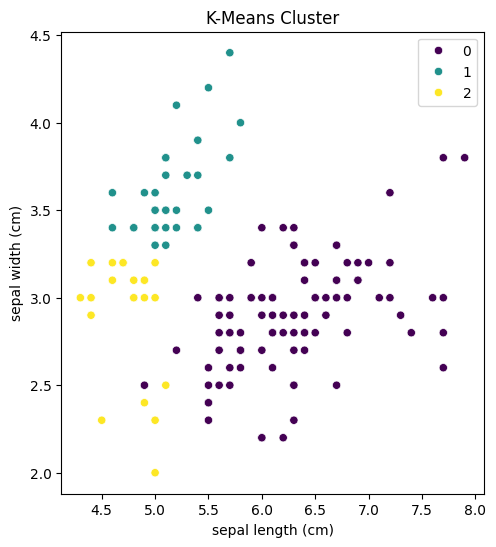

In [20]:

#visualizing the results

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=data.iloc[:,0], y=data.iloc[:, 1], hue=kmeans_labels, data=data, palette = 'viridis')
plt.title('K-Means Cluster')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
     

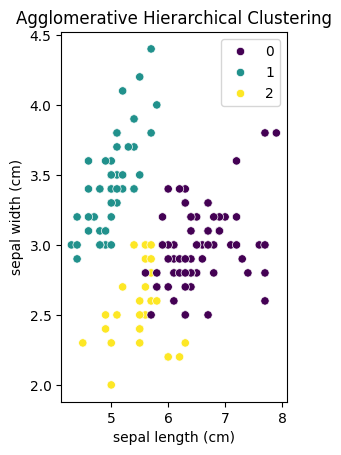

In [21]:
plt.subplot(1, 2,2)
sns.scatterplot(x=data.iloc[:,0], y=data.iloc[:, 1], hue=agg_labels, data=data, palette = 'viridis')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()